In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore') 

In [2]:
url = "https://raw.githubusercontent.com/omdena-scc/proj-predict-house-prices/main/scr/data/HouseForSaleData.csv"
df = pd.read_csv(url)
df.head()

#df = pd.read_csv('HouseForSaleData.csv', sep=',', na_values='\xa0' )
#df.head()

,indType,Property_Category,namCondominium,District,Street_name,property_subcategory,numNumber,Built_up_area,Area_total,Bedroom,...,totalGarages,totalRooms,valSales,latitude,longitude,totalAccess,flgHighlight,Property tax,Condominium,prop_char_95
0,S,Casas,Moradas São Carlos II,Jardim Ipanema,AV. OTTO WERNER ROSEL,Condomínio,1111.0,52.00,100.00,2,...,1.0,2.0,209000,-21.98484,-47.93834,0,0,30.0,130.0,NaN
1,S,Casas,NaN,Vila Carmem,RUA RAFAEL ABREU SAMPAIO,Padrão,95.0,118.98,187.50,2,...,2.0,2.0,340000,-22.02589,-47.90903,3,0,NaN,NaN,NaN
2,S,Terreno,NaN,Recreio dos Bandeirantes,RUA TRABALHO COM FRATERNIDADE,Lote,0.0,NaN,574.07,NaN,...,NaN,NaN,260000,-22.02245,-47.91236,2,0,NaN,NaN,NaN
3,S,Casas,NaN,Jardim Araucária,Rua Jaime Cordeiro,Padrão,235.0,98.00,195.00,2,...,3.0,2.0,285000,-21.97825,-47.94901,10,0,NaN,NaN,NaN
4,S,Apartamentos,Edifício London Park,Recreio São Judas Tadeu,Avenida Gregório Aversa,Padrão,127.0,NaN,49.00,2,...,1.0,2.0,265000,-22.03285,-47.87002,8,1,NaN,0.0,49.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6568 entries, 0 to 6567
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   indType               6568 non-null   object 
 1   Property_Category     6568 non-null   object 
 2   namCondominium        2861 non-null   object 
 3   District              6568 non-null   object 
 4   Street_name           6568 non-null   object 
 5   property_subcategory  6568 non-null   object 
 6   numNumber             6373 non-null   float64
 7   Built_up_area         3534 non-null   float64
 8   Area_total            6141 non-null   float64
 9   Bedroom               5340 non-null   object 
 10  Bathroom              5528 non-null   float64
 11  totalGarages          4979 non-null   float64
 12  totalRooms            5340 non-null   float64
 13  valSales              6568 non-null   int64  
 14  latitude              5262 non-null   float64
 15  longitude            

In [4]:
df.isna().sum()

indType                    0
Property_Category          0
namCondominium          3707
District                   0
Street_name                0
property_subcategory       0
numNumber                195
Built_up_area           3034
Area_total               427
Bedroom                 1228
Bathroom                1040
totalGarages            1589
totalRooms              1228
valSales                   0
latitude                1306
longitude               1306
totalAccess                0
flgHighlight               0
Property tax            1929
Condominium             3737
prop_char_95            3722
dtype: int64

In [5]:
# Value counts for each categorical feature: 

for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for indType:
S     6225
SL     343
Name: indType, dtype: int64

Value counts for Property_Category:
Casas           3017
Apartamentos    2023
Terreno         1130
Comercial        239
Rural            156
Industrial         3
Name: Property_Category, dtype: int64

Value counts for namCondominium:
Spazio Mont Royal                     71
Condomínio Recanto do Sabiá           52
Residencial Artemísia                 42
Condomínio Mont Park                  40
Residencial Portal do Mediterrâneo    39
                                      ..
Edifício Abrahão Bagnato               1
Edifício São Conrado                   1
Edifício Gadu 1                        1
Edificio Irene                         1
Edifício Alice Honce Mitre             1
Name: namCondominium, Length: 465, dtype: int64

Value counts for District:
CENTRO                      325
SANTA FELICIA               225
Parque Faber Castell        211
Cidade Jardim               160
Centro                      155
  

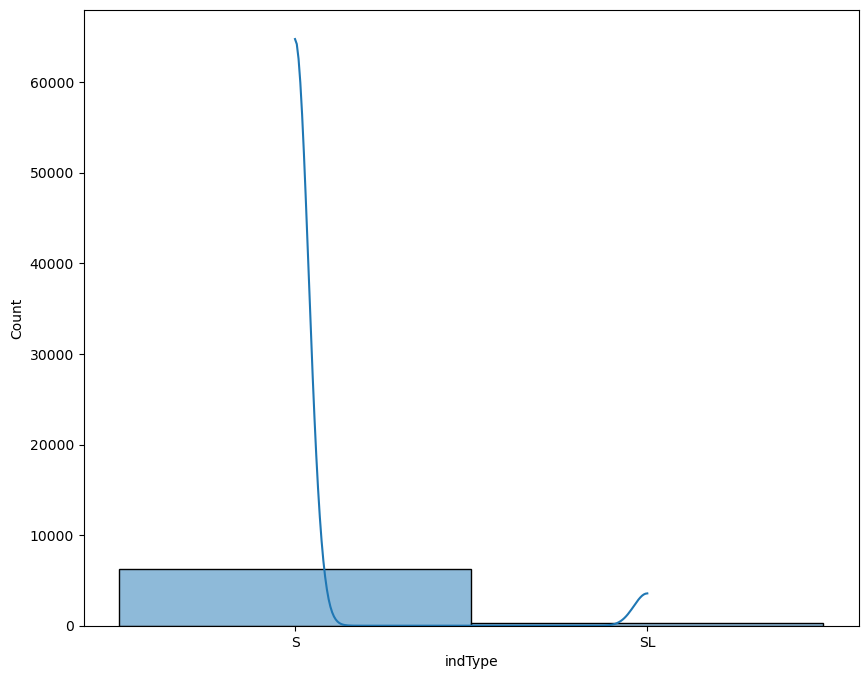

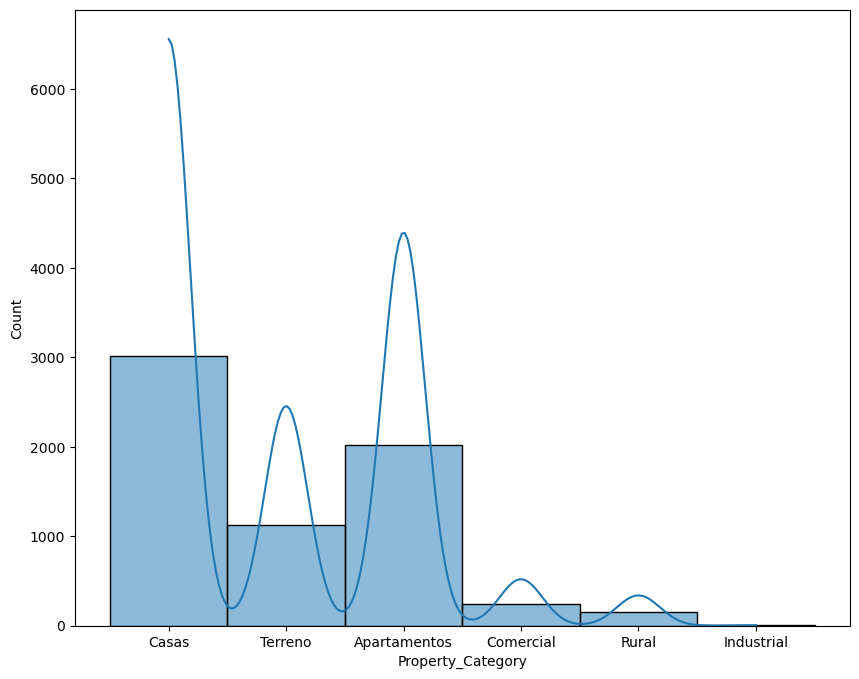

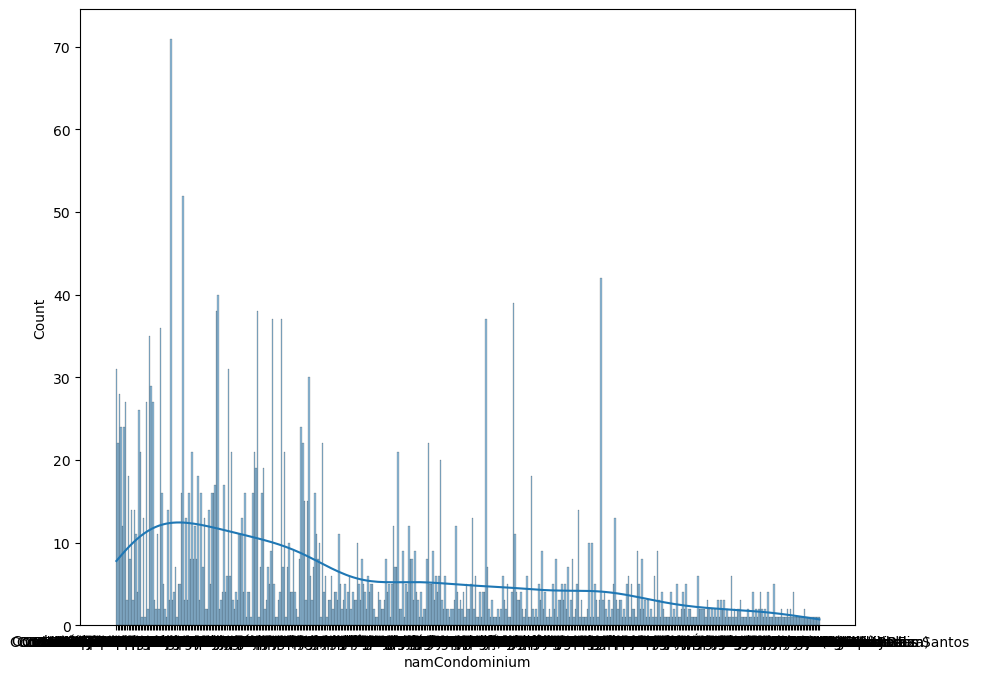

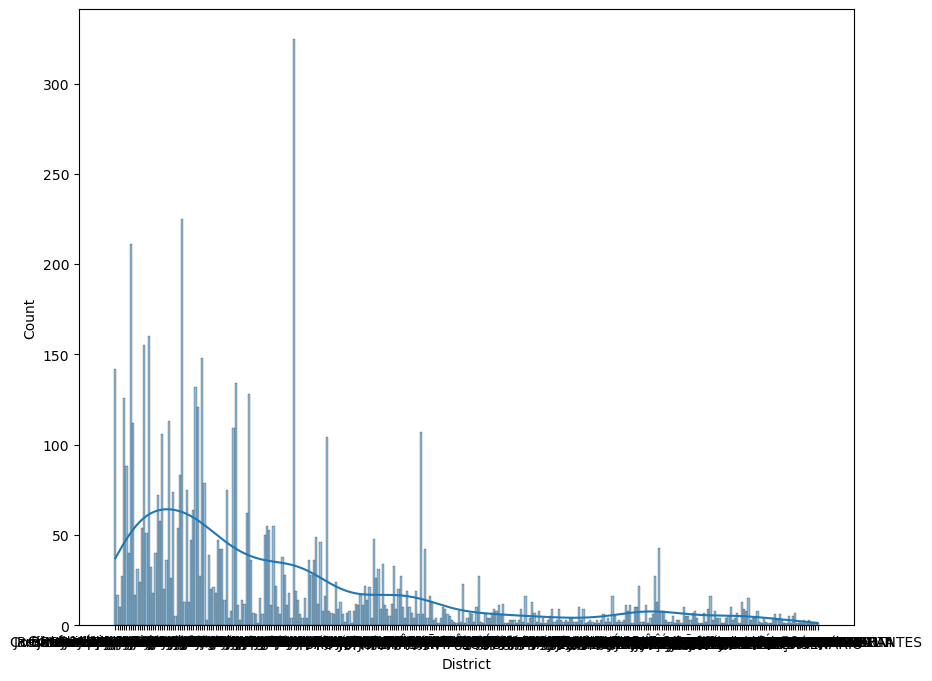

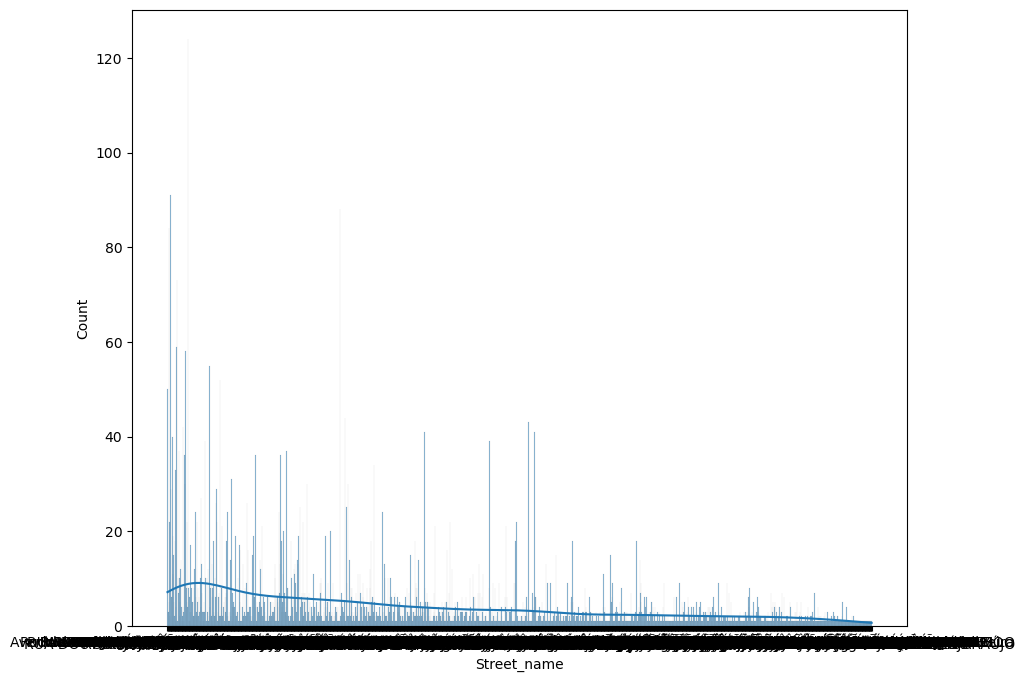

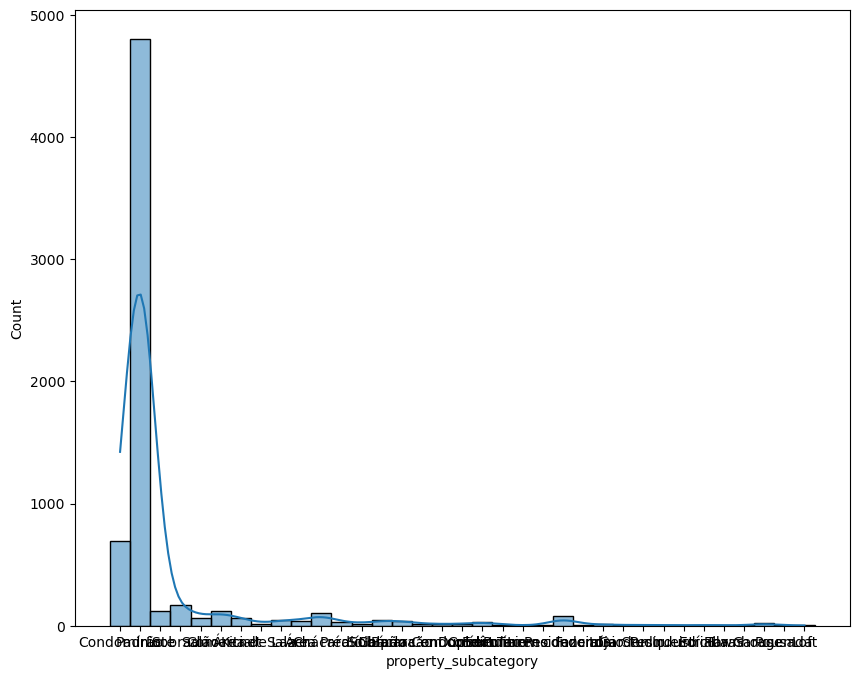

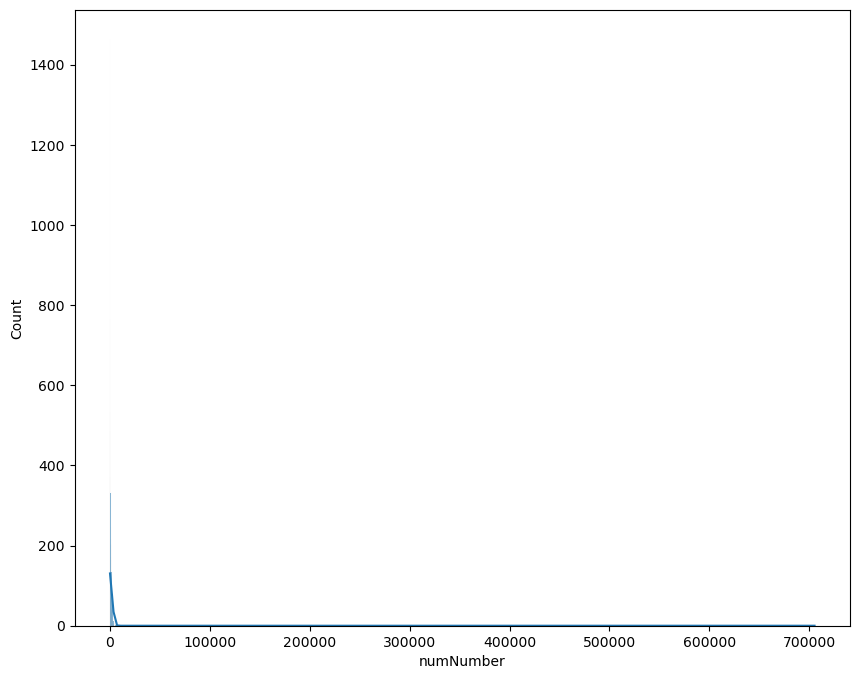

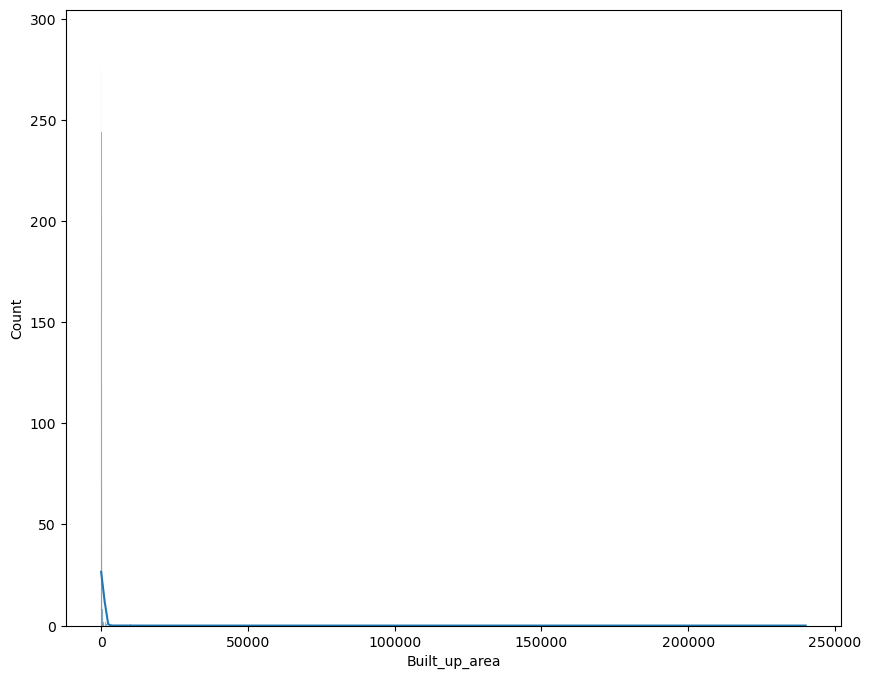

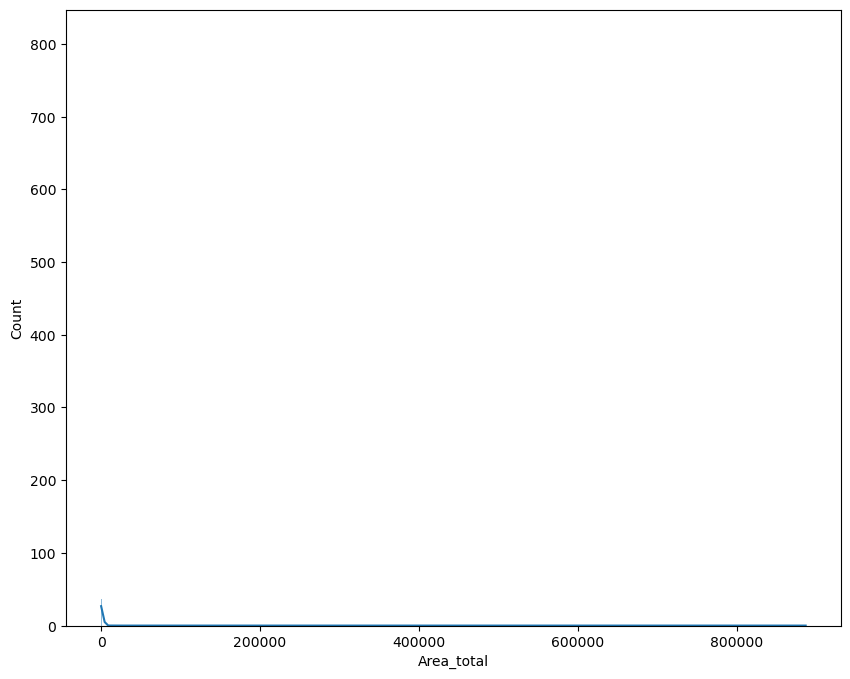

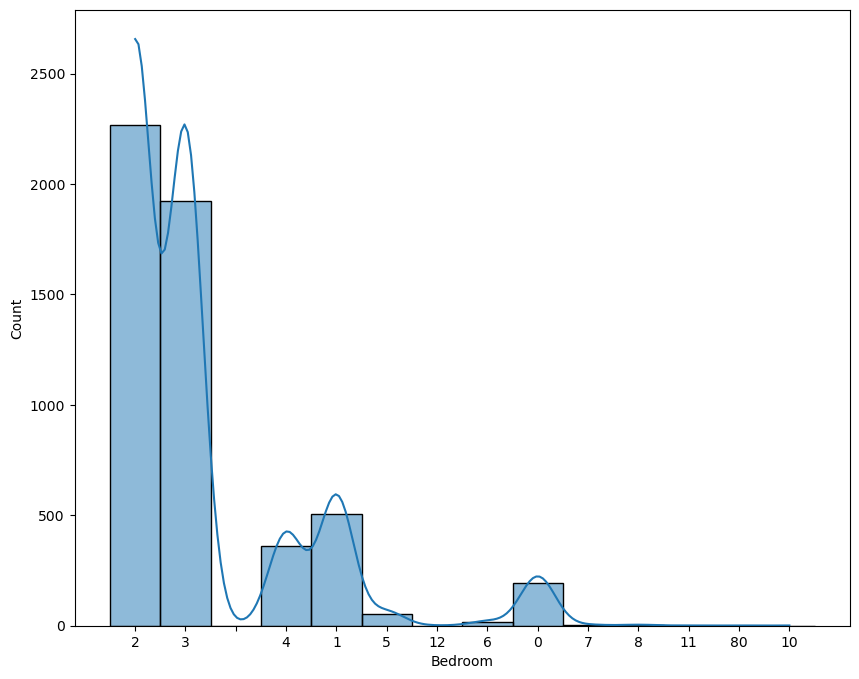

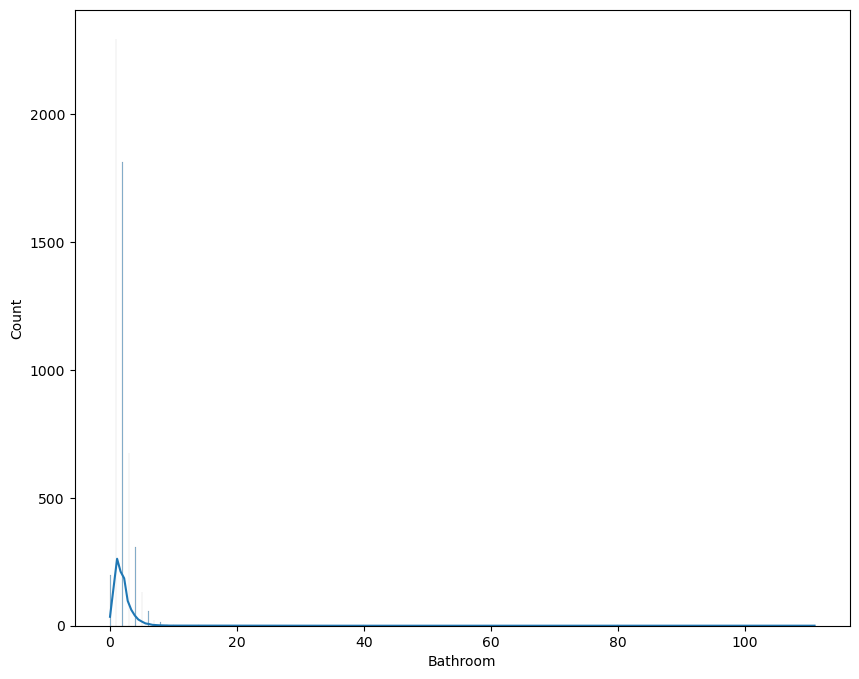

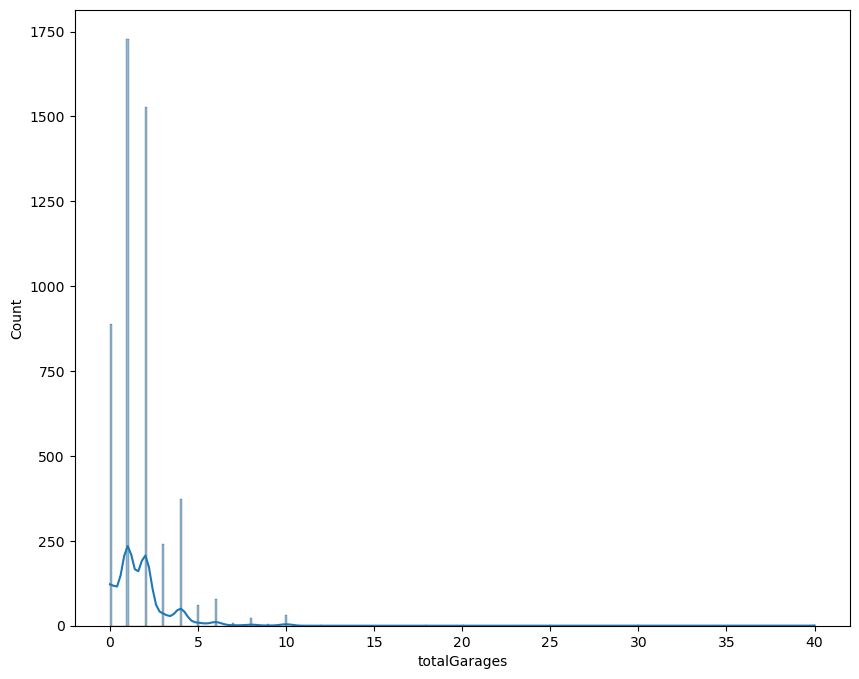

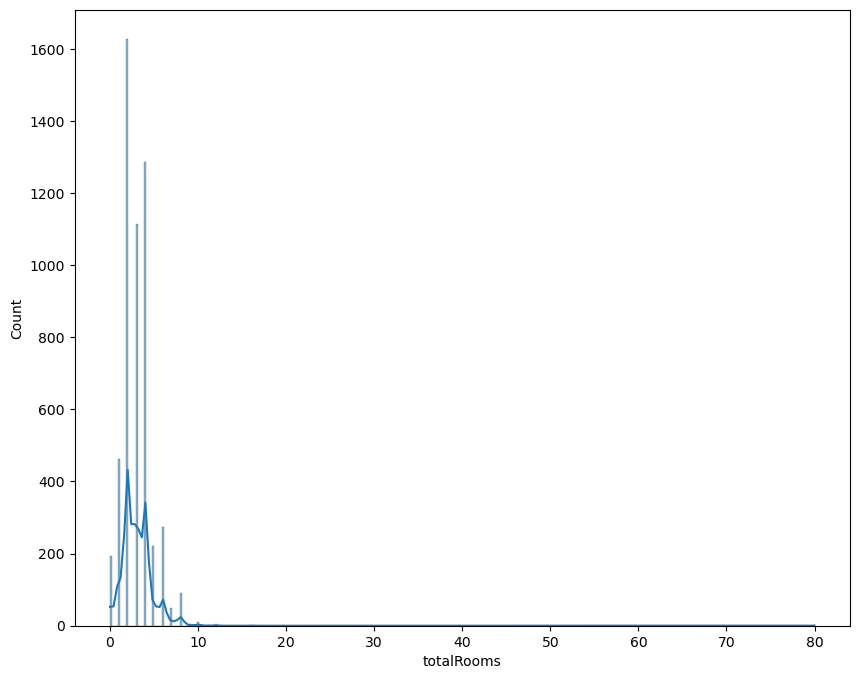

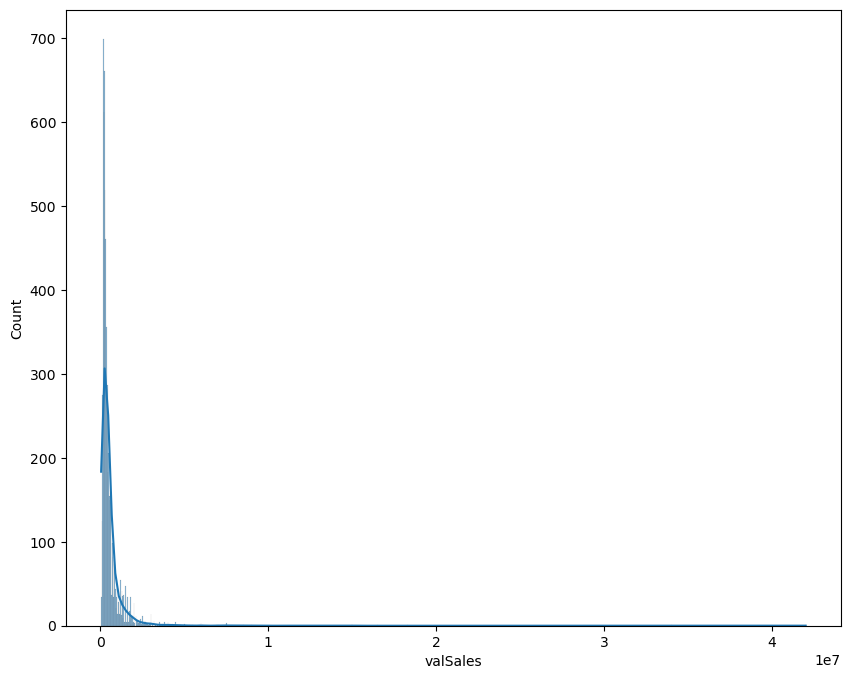

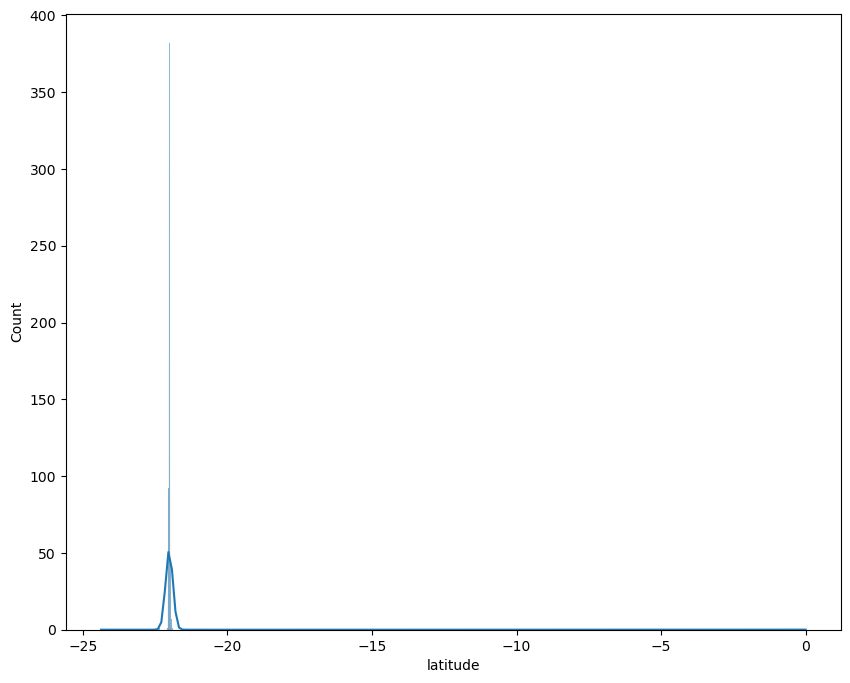

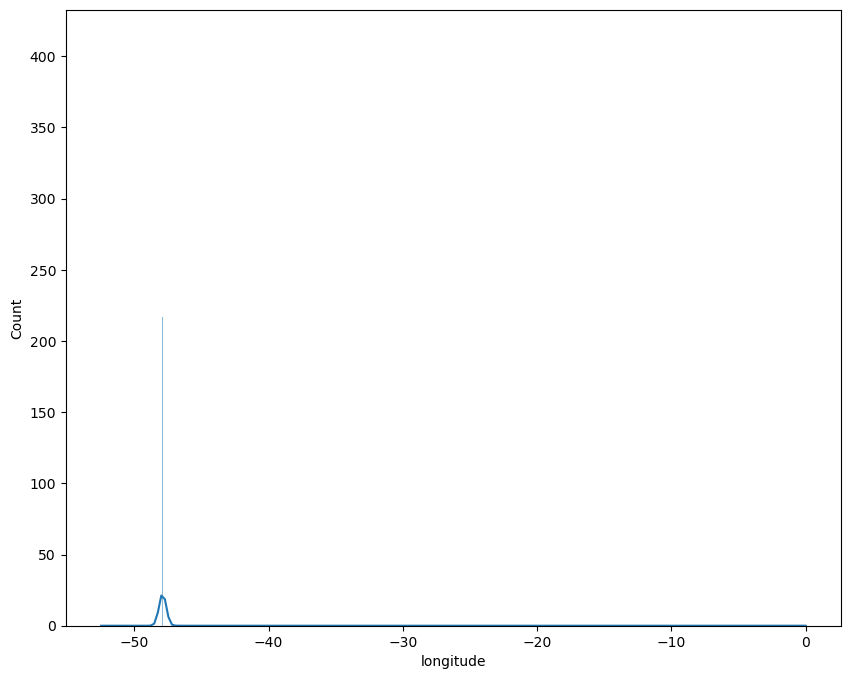

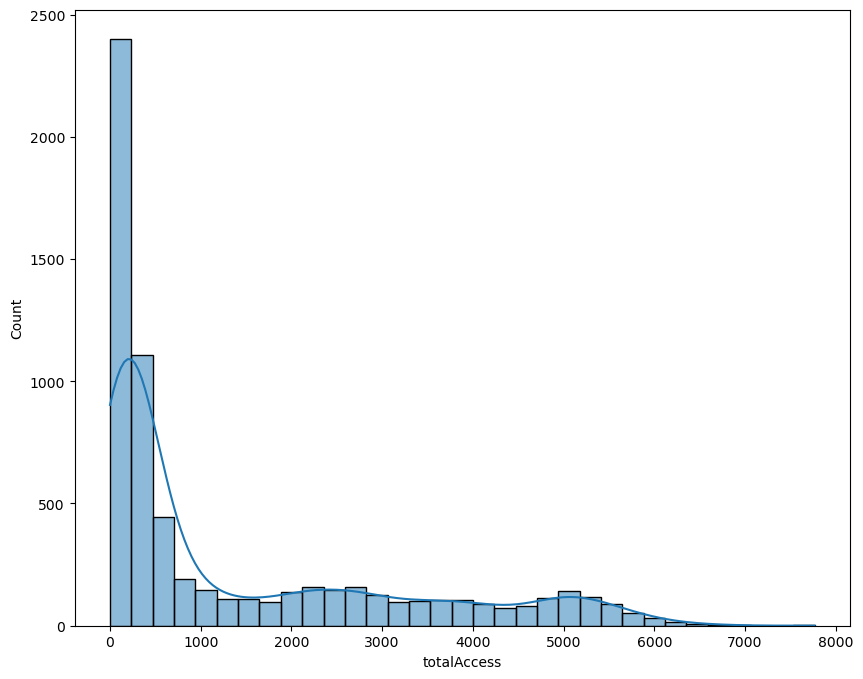

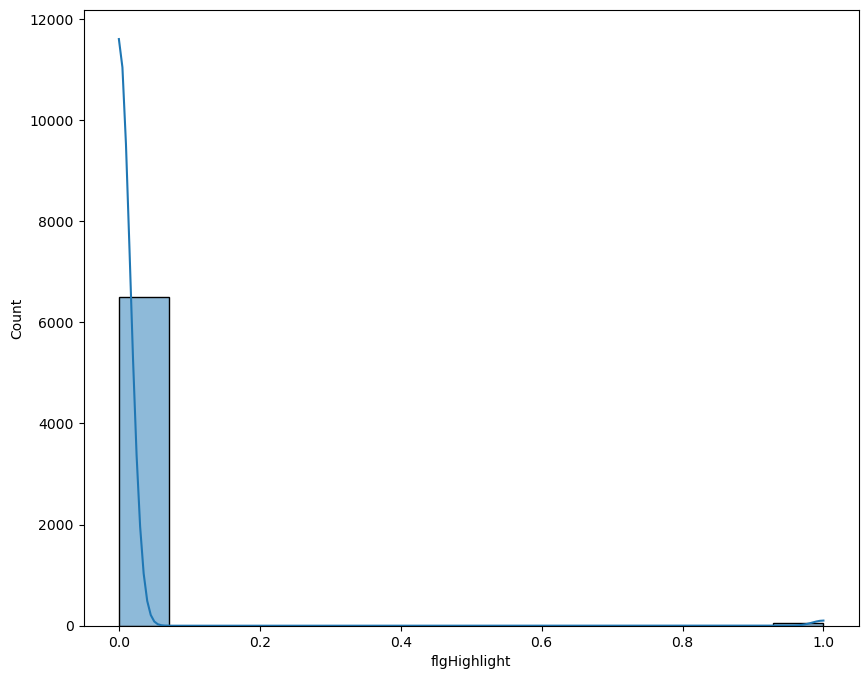

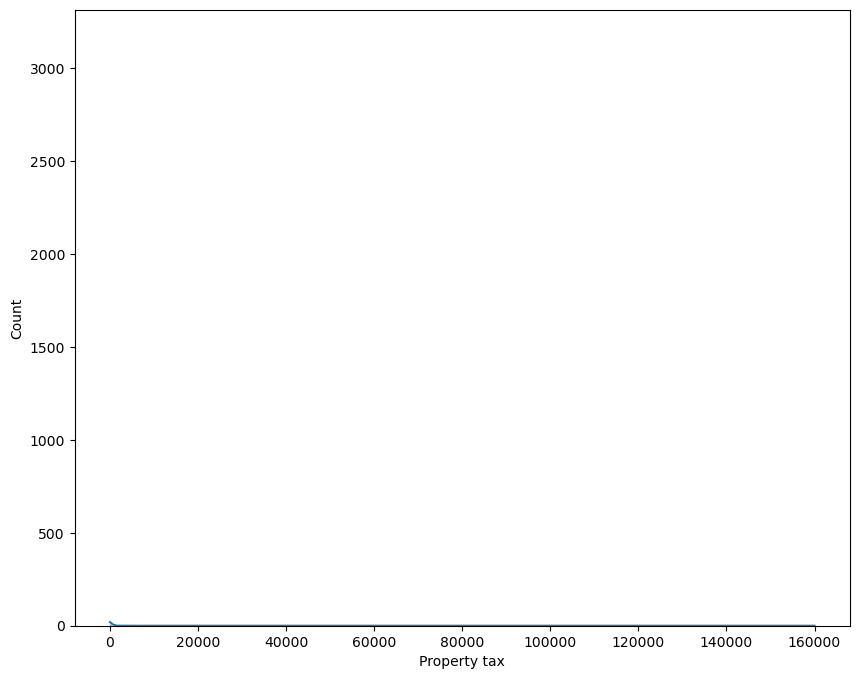

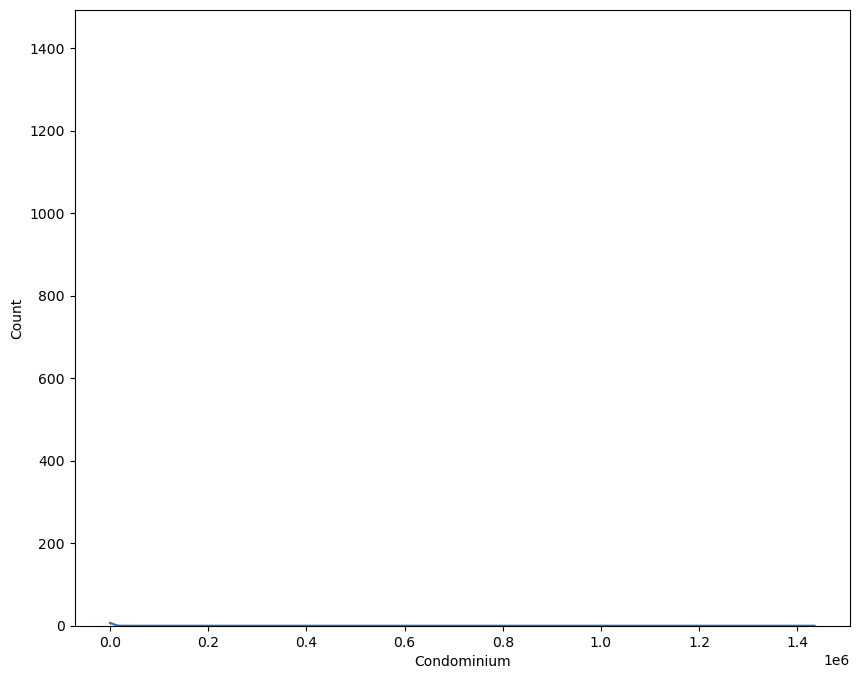

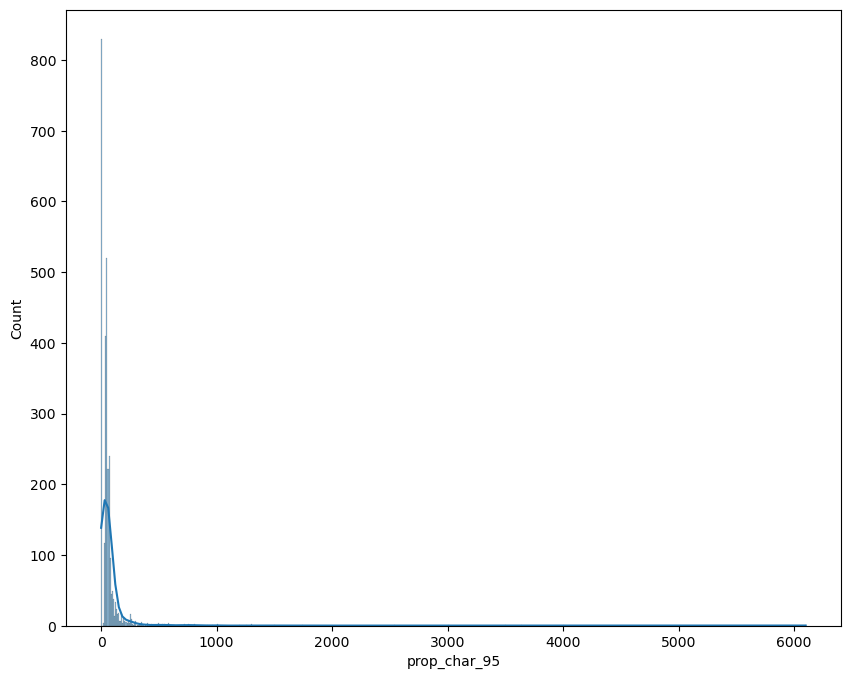

In [6]:
for i in df.columns:
    plt.figure(figsize = (10,8))
    sns.histplot(df[i], kde=True)
    plt.xlabel(i)
    plt.show()

**Insight into "valSales":**

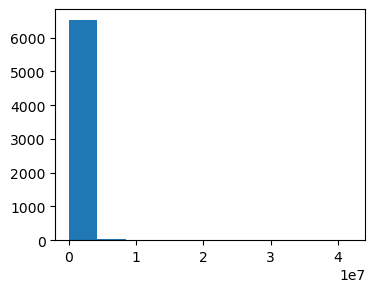

In [7]:
plt.figure(figsize=(4, 3))
plt.hist(df['valSales'])
plt.show()

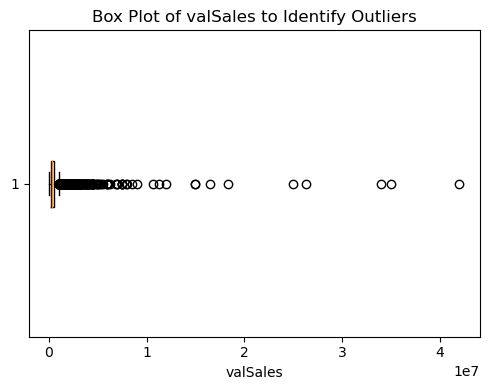

In [8]:
# Create a box plot to identify outliers in the 'price' column

plt.figure(figsize=(5, 4))
plt.boxplot(df['valSales'], vert=False)
plt.xlabel("valSales")
plt.title("Box Plot of valSales to Identify Outliers")
plt.tight_layout()
plt.show()

**Average valSales for "indType"**

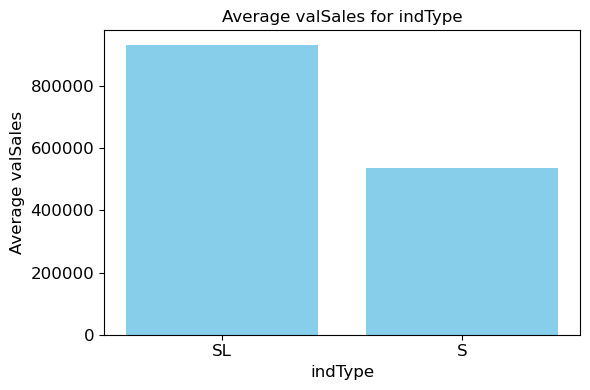

In [9]:
# Group data by "indType" and calculate the Average valSales:

average_valSales = df.groupby("indType")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False)

# Create a bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(average_valSales["indType"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("indType", fontsize=12)
plt.ylabel("Average valSales", fontsize=12)
plt.title("Average valSales for indType",fontsize=12)
#plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Average valSales for "Property_Category"**

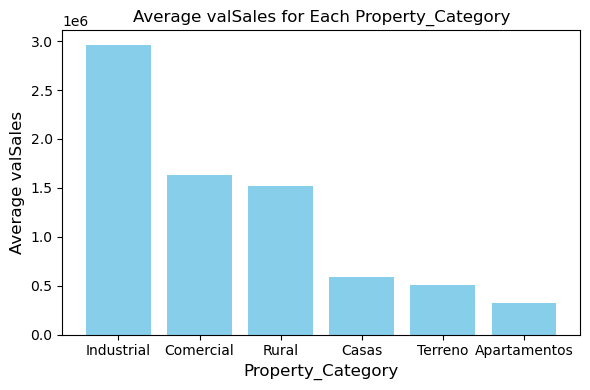

In [10]:
# Group data by Property_Category and calculate the Average valSales:

average_valSales = df.groupby("Property_Category")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False)

# Create a bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(average_valSales["Property_Category"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("Property_Category", fontsize=12)
plt.ylabel("Average valSales", fontsize=12)
plt.title("Average valSales for Each Property_Category",fontsize=12)
#plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Average valSales for "namCondominium"** - (top 50 Condominium)

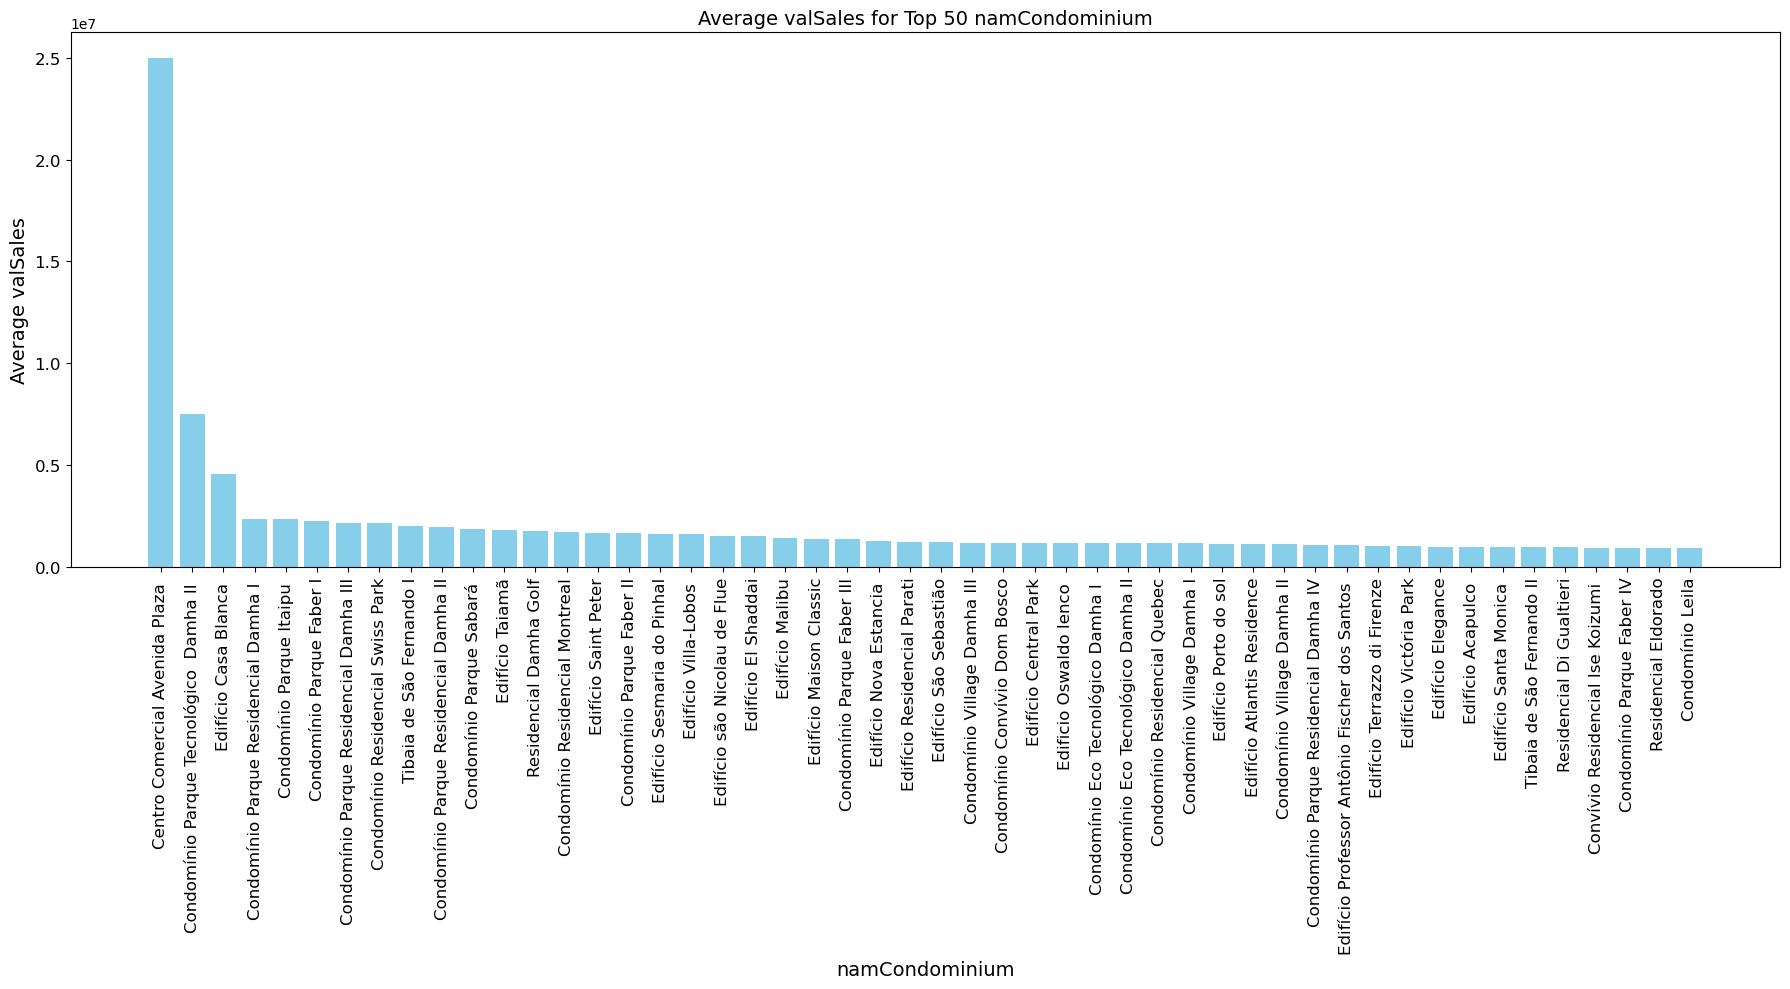

In [11]:
# Group data by "namCondominium" and calculate the Average valSales  (top 50 Condominium):

average_valSales = df.groupby("namCondominium")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False).head(50)

# Create a bar chart using matplotlib
plt.figure(figsize=(18, 10))
plt.bar(average_valSales["namCondominium"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("namCondominium", fontsize=14)
plt.ylabel("Average valSales", fontsize=14)
plt.title("Average valSales for Top 50 namCondominium",fontsize=14)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Average valSales for "District"**- top 50 District

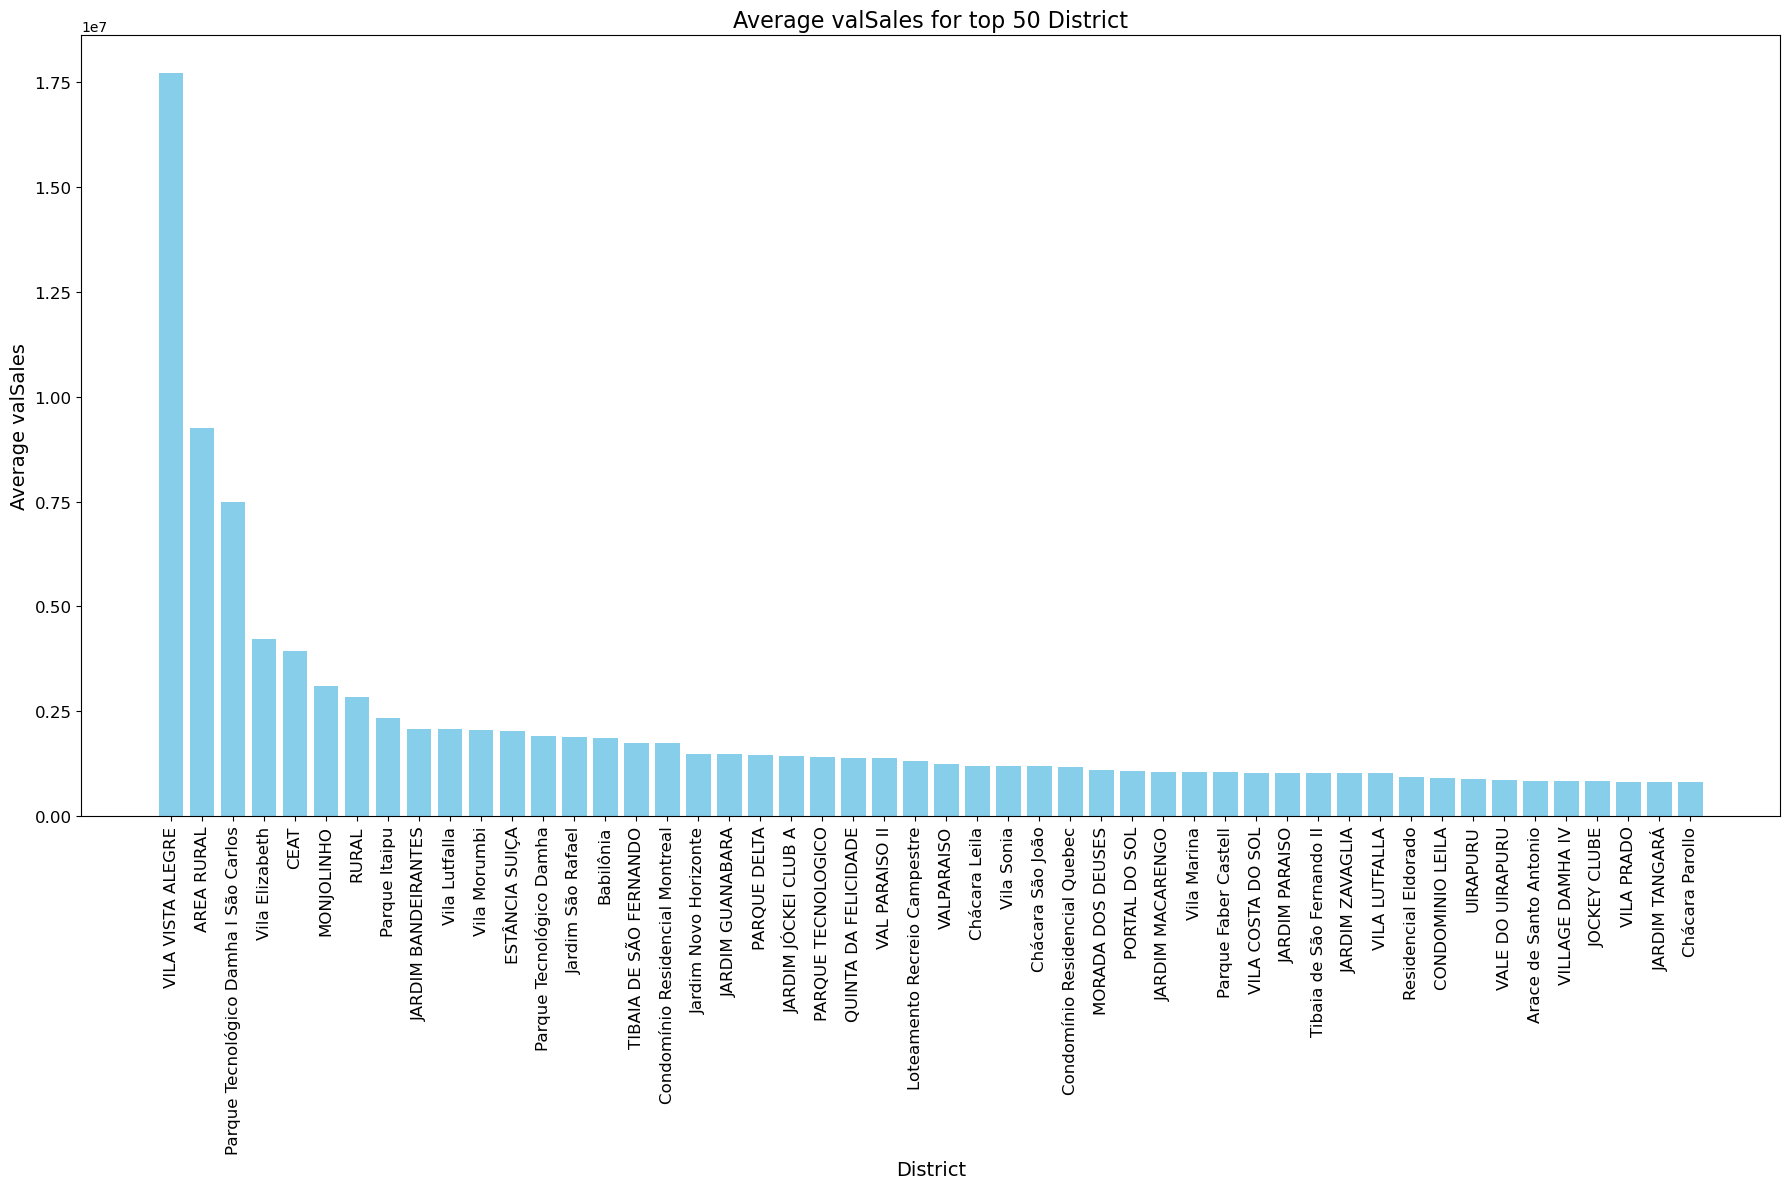

In [12]:
# Group data by "District" and calculate the Average valSales (top 50 District): 

average_valSales = df.groupby("District")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False).head(50)

# Create a bar chart using matplotlib
plt.figure(figsize=(18, 12))
plt.bar(average_valSales["District"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("District", fontsize=14)
plt.ylabel("Average valSales", fontsize=14)
plt.title("Average valSales for top 50 District",fontsize=16)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Average valSales for "Street_name"** - **top 50 Street**

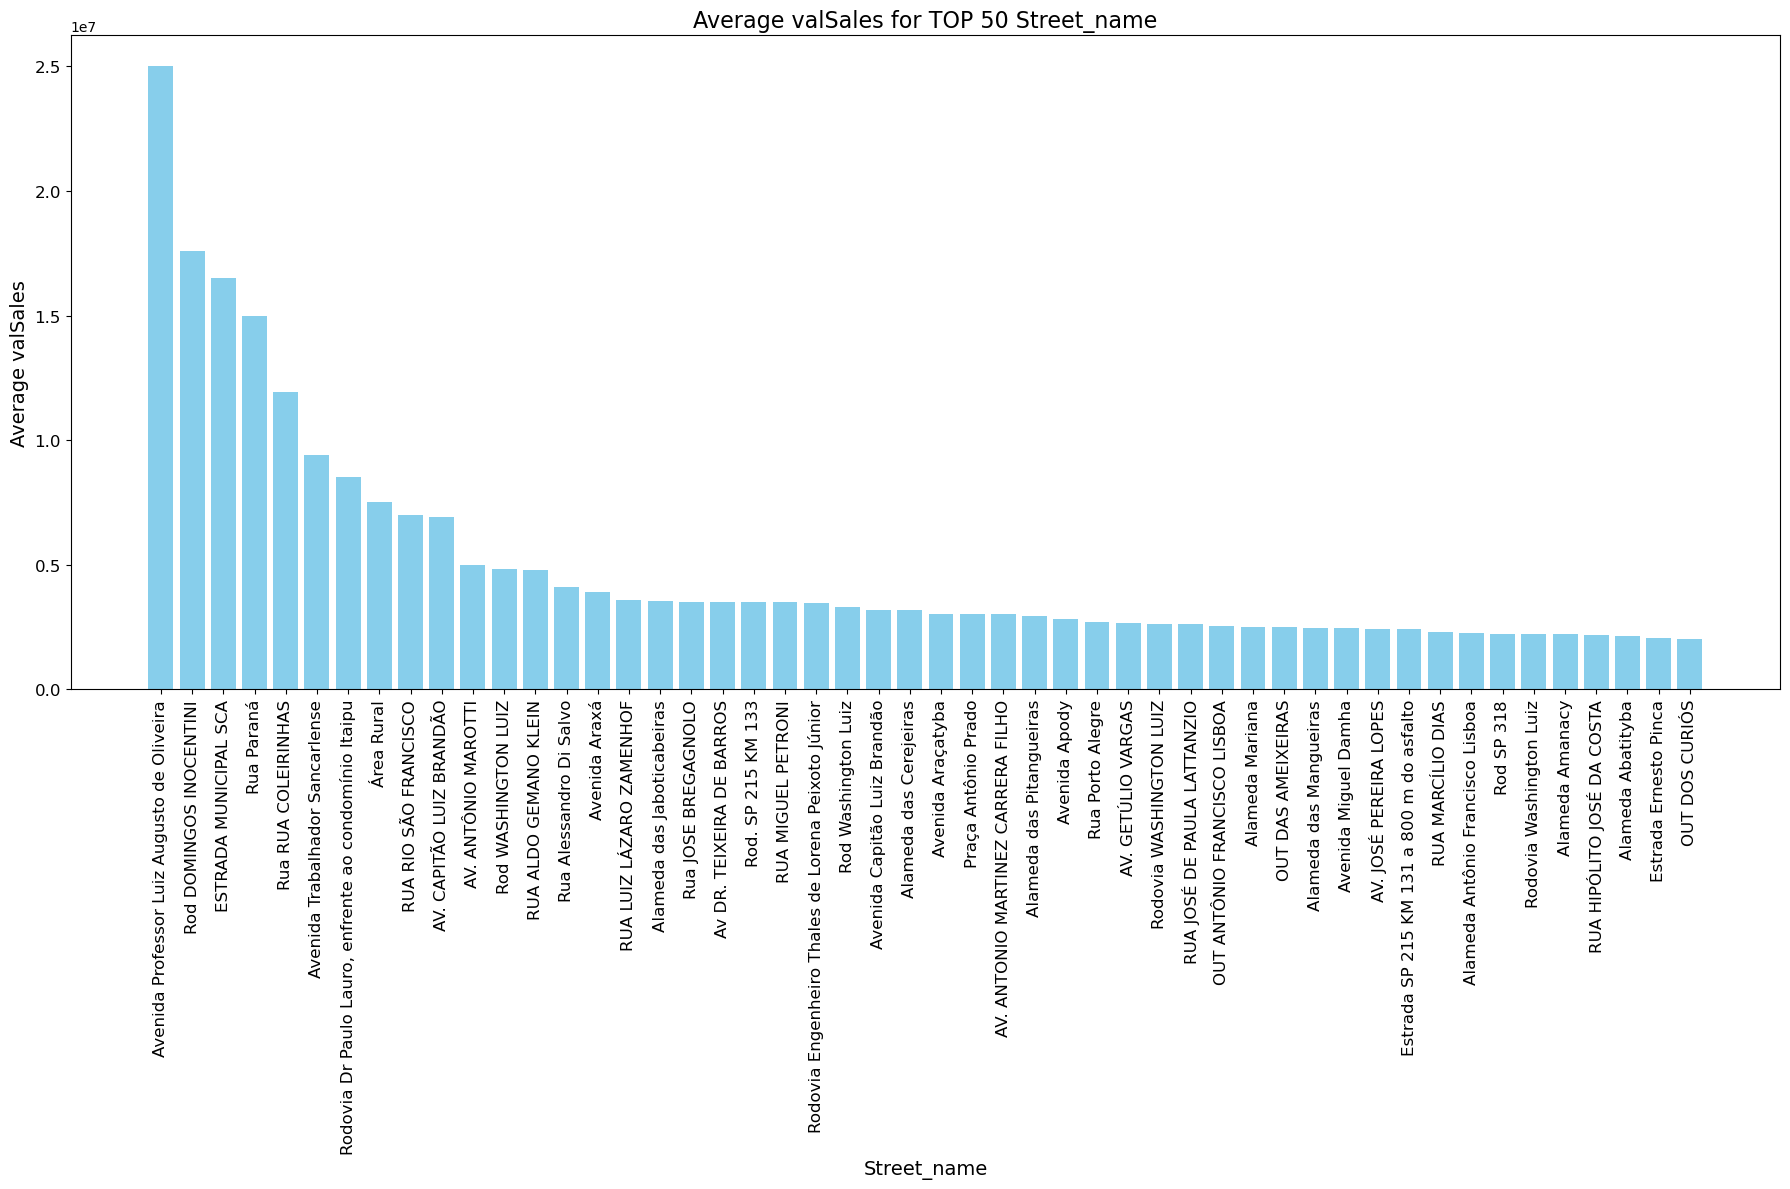

In [13]:
# Group data by "Street_name" and calculate the Average valSales (top 50 Street):

average_valSales = df.groupby("Street_name")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False).head(50)

# Create a bar chart using matplotlib
plt.figure(figsize=(18, 12))
plt.bar(average_valSales["Street_name"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("Street_name", fontsize=14)
plt.ylabel("Average valSales", fontsize=14)
plt.title("Average valSales for TOP 50 Street_name",fontsize=16)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Average valSales for "property_subcategory"**

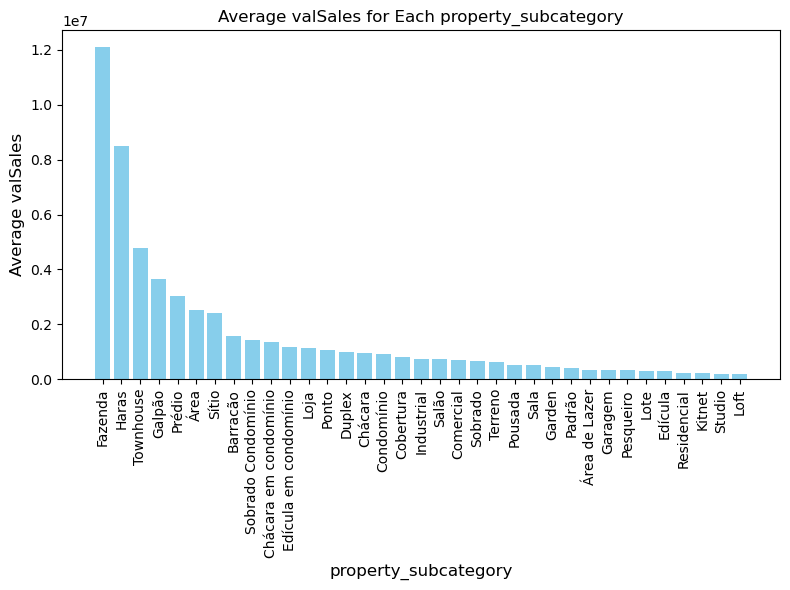

In [14]:
# Group data by "property_subcategory" and calculate the Average valSales:

average_valSales = df.groupby("property_subcategory")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False)

# Create a bar chart using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(average_valSales["property_subcategory"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("property_subcategory", fontsize=12)
plt.ylabel("Average valSales", fontsize=12)
plt.title("Average valSales for Each property_subcategory",fontsize=12)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


**Built_up_area and Area_total vs valSales**

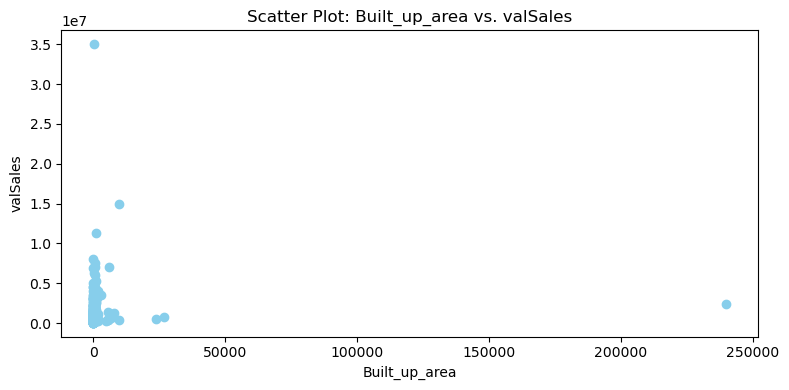

In [15]:
# Create a scatter plot of 'Built_up_area' against 'valSales'

plt.figure(figsize=(8, 4))
plt.scatter(df['Built_up_area'], df['valSales'], color='skyblue')
plt.xlabel("Built_up_area")
plt.ylabel("valSales")
plt.title("Scatter Plot: Built_up_area vs. valSales")
plt.tight_layout()
plt.show()

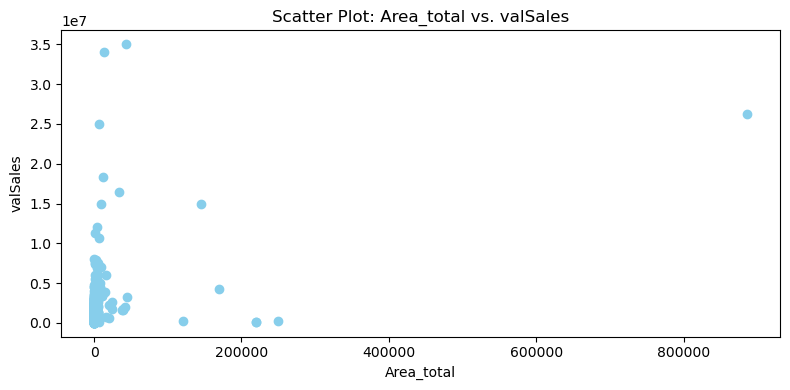

In [16]:
# Create a scatter plot of 'Area_total' against 'valSales'

plt.figure(figsize=(8, 4))
plt.scatter(df['Area_total'], df['valSales'], color='skyblue')
plt.xlabel("Area_total")
plt.ylabel("valSales")
plt.title("Scatter Plot: Area_total vs. valSales")
plt.tight_layout()
plt.show()

**Lattitudes and Longitudes vs valSales**

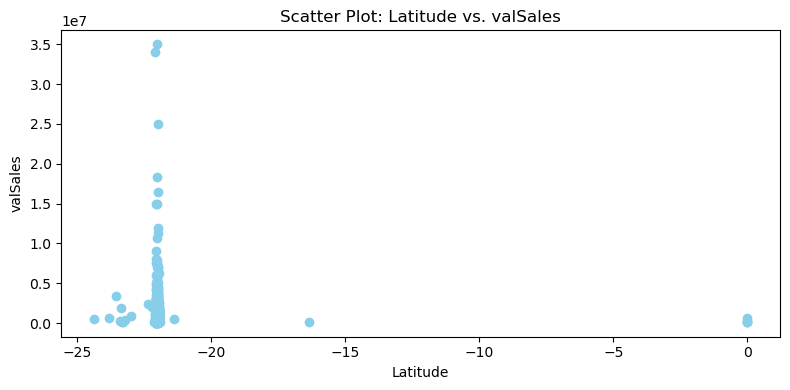

In [17]:
# Create a scatter plot of 'latitude' against 'valSales'

plt.figure(figsize=(8, 4))
plt.scatter(df['latitude'], df['valSales'], color='skyblue')
plt.xlabel("Latitude")
plt.ylabel("valSales")
plt.title("Scatter Plot: Latitude vs. valSales")
plt.tight_layout()
plt.show()

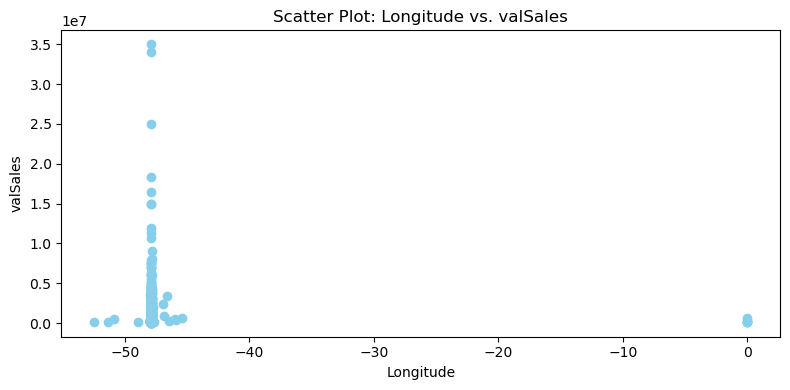

In [18]:
# Create a scatter plot of 'longitude' against 'valSales'
plt.figure(figsize=(8,4))
plt.scatter(df['longitude'], df['valSales'], color='skyblue')
plt.xlabel("Longitude")
plt.ylabel("valSales")
plt.title("Scatter Plot: Longitude vs. valSales")
plt.tight_layout()
plt.show()

**Average valSales for "flgHighlight"**

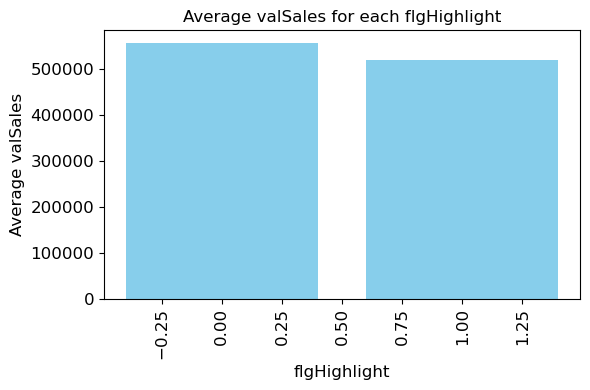

In [19]:
# Group data by "flgHighlight" and calculate the Average valSales:

average_valSales = df.groupby("flgHighlight")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False).head(50)

# Create a bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(average_valSales["flgHighlight"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("flgHighlight", fontsize=12)
plt.ylabel("Average valSales", fontsize=12)
plt.title("Average valSales for each flgHighlight",fontsize=12)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**"totalAccess" vs valSales**

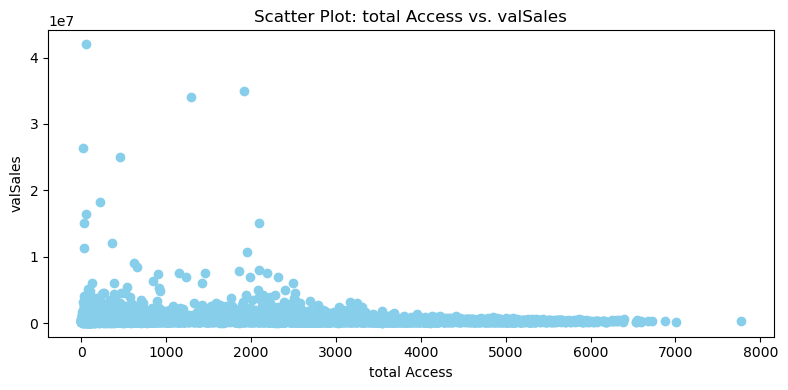

In [20]:
# Create a scatter plot of 'totalAccess' against 'valSales':

plt.figure(figsize=(8, 4))
plt.scatter(df['totalAccess'], df['valSales'], color='skyblue')
plt.xlabel("total Access")
plt.ylabel("valSales")
plt.title("Scatter Plot: total Access vs. valSales")
plt.tight_layout()
plt.show()

**"Property tax" vs valSales**

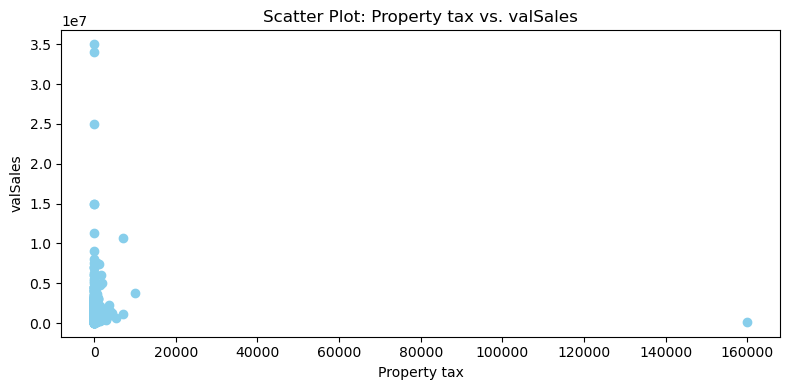

In [21]:
# Create a scatter plot of 'Property tax' against 'valSales'
plt.figure(figsize=(8, 4))
plt.scatter(df['Property tax'], df['valSales'], color='skyblue')
plt.xlabel("Property tax")
plt.ylabel("valSales")
plt.title("Scatter Plot: Property tax vs. valSales")
plt.tight_layout()
plt.show()

**Average valSales for "totalRooms"**

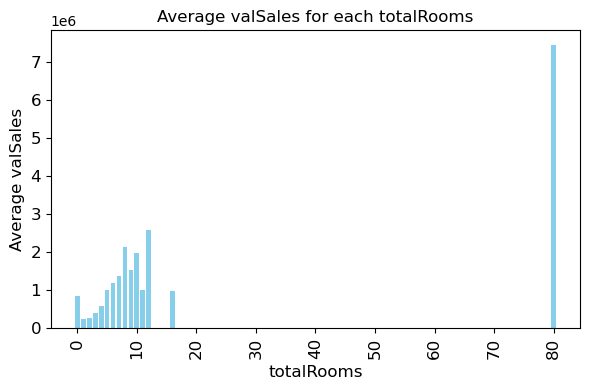

In [22]:
# Group data by "totalRooms" and calculate the Average valSales:

average_valSales = df.groupby("totalRooms")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False)

# Create a bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(average_valSales["totalRooms"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("totalRooms", fontsize=12)
plt.ylabel("Average valSales", fontsize=12)
plt.title("Average valSales for each totalRooms",fontsize=12)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Average valSales for "totalGarages"**

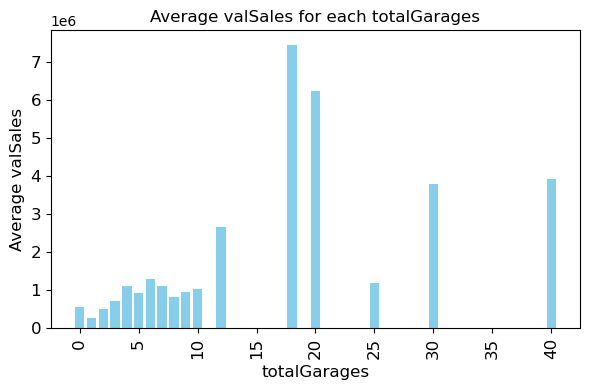

In [23]:
# Group data by "totalGarages" and calculate the Average valSales:

average_valSales = df.groupby("totalGarages")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False)

# Create a bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(average_valSales["totalGarages"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("totalGarages", fontsize=12)
plt.ylabel("Average valSales", fontsize=12)
plt.title("Average valSales for each totalGarages",fontsize=12)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Average valSales for "Bathroom"**

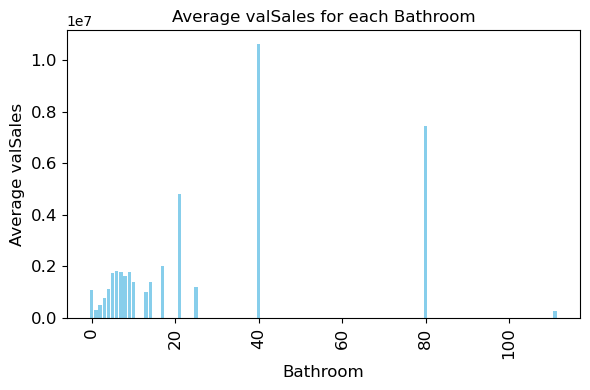

In [24]:
# Group data by "Bathroom" and calculate the Average valSales:

average_valSales = df.groupby("Bathroom")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False)

# Create a bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(average_valSales["Bathroom"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("Bathroom", fontsize=12)
plt.ylabel("Average valSales", fontsize=12)
plt.title("Average valSales for each Bathroom",fontsize=12)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Average valSales for "Bedroom"**

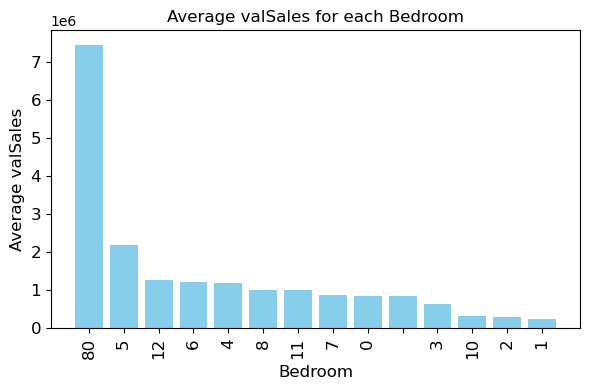

In [25]:
# Group data by "Bedroom" and calculate the Average valSales:

average_valSales = df.groupby("Bedroom")["valSales"].mean().reset_index()

# Sort the data by "valSales" in descending order
average_valSales = average_valSales.sort_values(by="valSales", ascending=False)

# Create a bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(average_valSales["Bedroom"], average_valSales["valSales"], color='skyblue') 
plt.xlabel("Bedroom", fontsize=12)
plt.ylabel("Average valSales", fontsize=12)
plt.title("Average valSales for each Bedroom",fontsize=12)
plt.xticks(rotation=90)
# Set font size for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**"Condominium" vs valSales**

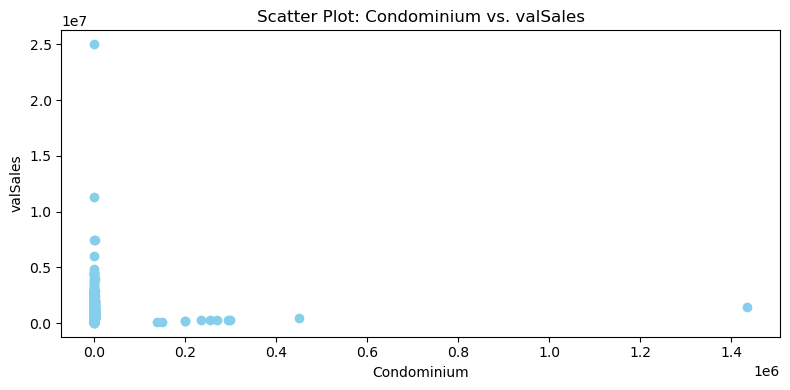

In [26]:
# Create a scatter plot of 'Condominium' against 'valSales'
plt.figure(figsize=(8, 4))
plt.scatter(df['Condominium'], df['valSales'], color='skyblue')
plt.xlabel("Condominium")
plt.ylabel("valSales")
plt.title("Scatter Plot: Condominium vs. valSales")
plt.tight_layout()
plt.show()

**"prop_char_95" vs valSales**

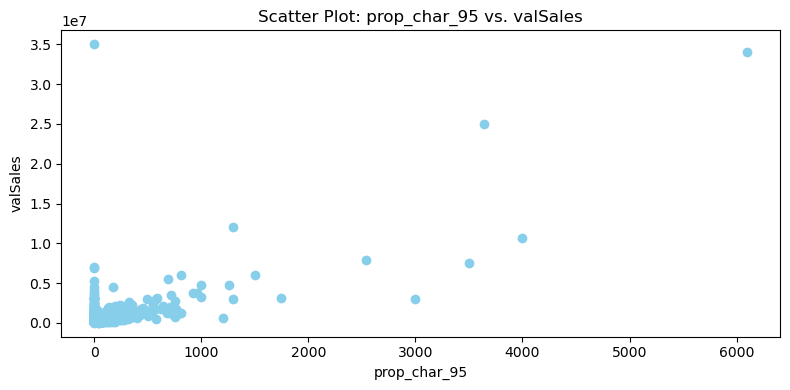

In [27]:
# Create a scatter plot of 'prop_char_95' against 'valSales'
plt.figure(figsize=(8, 4))
plt.scatter(df['prop_char_95'], df['valSales'], color='skyblue')
plt.xlabel("prop_char_95")
plt.ylabel("valSales")
plt.title("Scatter Plot: prop_char_95 vs. valSales")
plt.tight_layout()
plt.show()